In [2]:
import os
from sys import platform

import pyNetLogo

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from collections import Counter

import seaborn as sns

In [3]:
if platform == "linux":
    os.environ["NetLogo"] = "/home/paulo/Desktop/TFC/NetLogo-6.2.1-64/NetLogo 6.2.1"
    
for key in os.environ:
    if key.lower() == "netlogo":
        print(f"{key} -> {os.environ[key]}")

NetLogo -> /home/paulo/Desktop/TFC/NetLogo-6.2.1-64/NetLogo 6.2.1


In [4]:
if platform == "linux":
    ku_model_path = os.path.abspath(os.getcwd()) + "/files/knowledge_units_with_board.nlogo"    
elif platform == "win32":
    ku_model_path = os.path.abspath(os.getcwd()) + "\\files\\knowledge_units_with_board.nlogo"

netlogo = pyNetLogo.NetLogoLink(
    # ADD ( NetLogo : path )  AS AN ENVIRONMENT VARIABLE !!!
    gui=False,
    netlogo_home = os.environ['NetLogo'],
    netlogo_version="6.2",
)

netlogo.load_model(ku_model_path)

netlogo.command("setup")
netlogo.command("repeat 200 [go]")

In [5]:
# change interface vars
# keys = [
#     "number_of_agents",
#     "ku_number",
#     "ku_len",
#     "c_threshold",
# ]
# values = [6, 9, 8, 0.5]

# experiment = {k: v for k, v in zip(keys, values)}

# Set the input parameters
# for key, value in zip(keys, values):
#     if key == "random-seed":
#         # The NetLogo random seed requires a different syntax
#         netlogo.command("random-seed {}".format(value))
#     else:
#         # Otherwise, assume the input parameters are global variables
#         netlogo.command(f"set {key} {value}")
# netlogo.command("set random-seed 250474")

In [17]:
def nd_array_to_compats(ndarr):
    compats = []
    curr_compat = []

    # iterate current and next element
    for curr, _next in zip(ndarr, ndarr[1:]):
        curr_compat.append(curr)

        # if next element is lower than current, a new instance started
        if _next < curr:
            # add compats and reset temp var
            compats.append(curr_compat)
            curr_compat = []

    # REMOVE FIRST ELEMENT
    compats[0].pop(0)

    return compats

# colours = ['red', 'green', 'blue']
def gen_graph(compatibilities):
    fig, ax = plt.subplots()
    ax.set_xlabel("Tick")
    ax.set_ylabel("Hamming Distances")
    ax.set_aspect(100)
    plt.title("Hamming Distances per Tick")
    # fig.set_size_inches(5, 5)

    plt.yticks([0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0])

    for index, compats in enumerate(compatibilities):
        if index % 10 == 0:
            for c, size in Counter(compats).items():
                # print(size)
                ax.scatter(x=index, y=c, s=(size**2), color="blue")  # color=colours[size%3]

    # sns.scatterplot(data= compatibilities)

    plt.savefig("files/new_plot.jpg", dpi=300, transparent=False)
    plt.show()


def plot_nd_arr(arr, ylabel, type="line",aspect=70):
    df = pd.DataFrame(arr)

    fig, ax = plt.subplots()
    ax.set_aspect(aspect)
    ax.set_xlabel("Tick")
    ax.set_ylabel(ylabel)
    plt.title(f"{ylabel} / Tick")

    if type == "line":
        sns.lineplot(data=df, x=range(len(arr)), y=df[0])
    elif type == "scatter":
        sns.scatterplot(data=df, x=range(len(arr)), y=df[0])
    else:
        sns.barplot(data=df, x=range(len(arr)), y=df[0])
    
    # print(df.describe())

[0.     0.3125 0.5    0.5625 0.625  0.625  0.4375 0.5    0.5625 0.625
 0.5625 0.5625 0.5625 0.5625 0.625  0.5625 0.5625 0.6875 0.75   0.75
 0.5625 0.5625 0.625  0.375  0.375  0.5    0.5625 0.625  0.6875 0.4375
 0.625  0.625  0.3125 0.5625 0.6875 0.625  0.75   0.375  0.5625 0.4375
 0.5625 0.3125 0.375  0.625  0.625  0.75   0.625  0.6875 0.75   0.4375
 0.5    0.75   0.3125 0.5    0.5    0.5625 0.5    0.6875 0.375  0.4375
 0.5    0.5    0.5625 0.5    0.6875 0.6875 0.8125 0.5625 0.5625 0.625
 0.375  0.5    0.625  0.5625 0.6875 0.5    0.5625 0.3125 0.25   0.4375
 0.75   0.5625 0.75   0.4375 0.5    0.5    0.625  0.3125 0.5    0.5
 0.5625 0.5625 0.5625 0.5625 0.4375 0.6875 0.375  0.5    0.5    0.5625
 0.5625 0.5625 0.875  0.4375 0.6875 0.4375 0.5    0.5625 0.5625 0.5625
 0.6875 0.75   0.5    0.5625 0.6875 0.5    0.5625 0.5625 0.75   0.5625
 0.5625 0.625  0.6875 0.6875 0.5625 0.6875 0.4375 0.5    0.3125 0.6875
 0.5    0.5    0.5625 0.625  0.5625 0.5625 0.6875 0.75   0.375  0.5625
 0.5625 0.5  

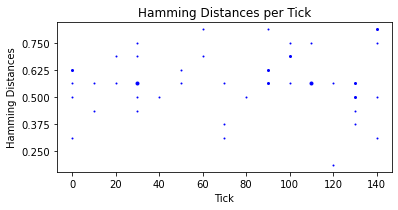

In [7]:
# TODO : representar MELHOR quantas vezes cada valor é repetido
# violin plot?

netlogo.command("setup")
# run go 200 times
netlogo.command("repeat 200 [go]")

# returns an ndarray
report = netlogo.report("compats-report")
print(report)
gen_graph(nd_array_to_compats(report))

# TODO : m / f graphs

In [8]:
netlogo.command("setup")
netlogo.command("repeat 200 [go]")

                0
count  201.000000
mean     0.014925
std      0.908172
min     -1.000000
25%     -1.000000
50%      0.000000
75%      1.000000
max      1.000000


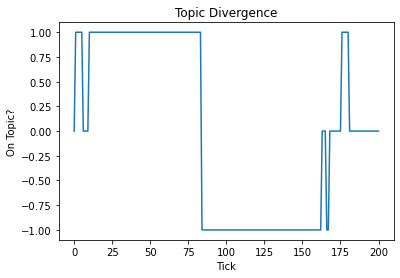

In [9]:
netlogo.command("setup")
netlogo.command("repeat 200 [go]")

all_compat_ratios = netlogo.report("compat-ratio-report")

compat_df = pd.DataFrame(all_compat_ratios)
compat_df

fig, ax = plt.subplots()
ax.set_xlabel("Tick")
ax.set_ylabel("On Topic?")
plt.title("Topic Divergence")

# plt.yticks([-2.0, -1.0, 0.0, 1.0, 2.0])

sns.lineplot(data=compat_df, x=range(201), y=compat_df[0])

print(compat_df.describe())

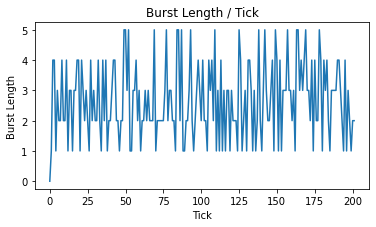

In [25]:
# burst_lengths = netlogo.report("burst-length-report")

# burst_lengths_df = pd.DataFrame(burst_lengths)
# burst_lengths_df

# fig, ax = plt.subplots()
# ax.set_xlabel("Tick")
# ax.set_ylabel("Length")
# plt.title("Burst Length")

# sns.lineplot(data=burst_lengths_df, x=range(202), y=burst_lengths_df[0])

# print(burst_lengths_df.describe())

plot_nd_arr(netlogo.report("burst-length-report"), ylabel="Burst Length", type="line", aspect=20)

In [11]:
# netlogo.command('set Method "Attention Norm - General"')
netlogo.report("get-method")

'Attention Norm - Gendered'

In [12]:
netlogo.report("get-probs")

array([0.  , 0.65, 0.35])

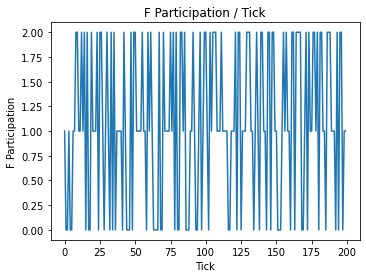

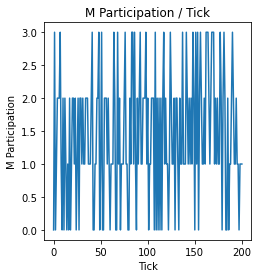

In [13]:
participation = netlogo.report("mf-participation-report")
female_part = participation[1::2] # Elements from list1 starting from 1 iterating by 2
male_part = participation[::2]

plot_nd_arr(female_part, ylabel="F Participation", type="line")
plot_nd_arr(male_part, ylabel="M Participation", type="line")

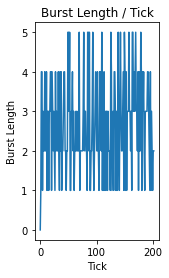

In [14]:
plot_nd_arr(netlogo.report("burst-length-report"), ylabel="Burst Length", type="line")

In [29]:
def show_sim_stats():
    """prints graph pertaining to the ran simulation"""
    plot_nd_arr(netlogo.report("burst-length-report"), ylabel="Burst Length / Tick", type="line", aspect=20)
    
    participation = netlogo.report("mf-participation-report")
    female_part = participation[1::2] # Elements from list1 starting from 1 iterating by 2
    male_part = participation[::2]

    plot_nd_arr(female_part, ylabel="F Participation", type="line")
    plot_nd_arr(male_part, ylabel="M Participation", type="line")

# show_sim_stats()

In [35]:
def run_scenario(method, females, males, f_exploit, m_exploit):    
    netlogo.command(f'set Method "{method}"')
    netlogo.command(f'set females {females}')
    netlogo.command(f'set males {males}')
    netlogo.command(f'set female_prob_exploit {f_exploit}')
    netlogo.command(f'set male_prob_exploit {m_exploit}')
    netlogo.command("setup")
    netlogo.command("repeat 200 [go]")
    show_sim_stats()

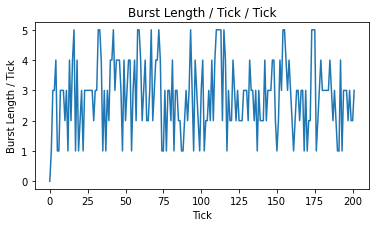

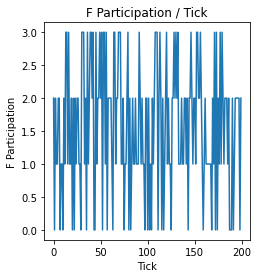

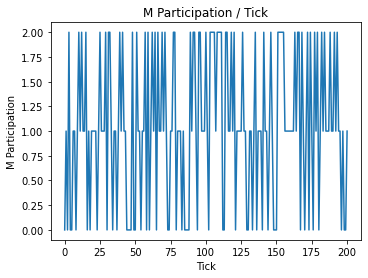

In [36]:
# Scenario 1 : Working Class
# 1 : 1 Att Norm General

run_scenario("Attention Norm - General", 1, 1, 0.65, 0.25)

# netlogo.command('set Method "Attention Norm - General"')
# netlogo.command('set females 1')
# netlogo.command('set males 1')
# netlogo.command('set female_prob_exploit 0.65')
# netlogo.command('set male_prob_exploit 0.25')

